### MNIST dataset

Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (1000, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 random_rotation (RandomRotatio  (None, 28, 28, 1)   0           ['input_1[0][0]']                
 n)                                                                                               
                                                                                                  
 random_zoom (RandomZoom)       (None, 28, 28, 1)    0  

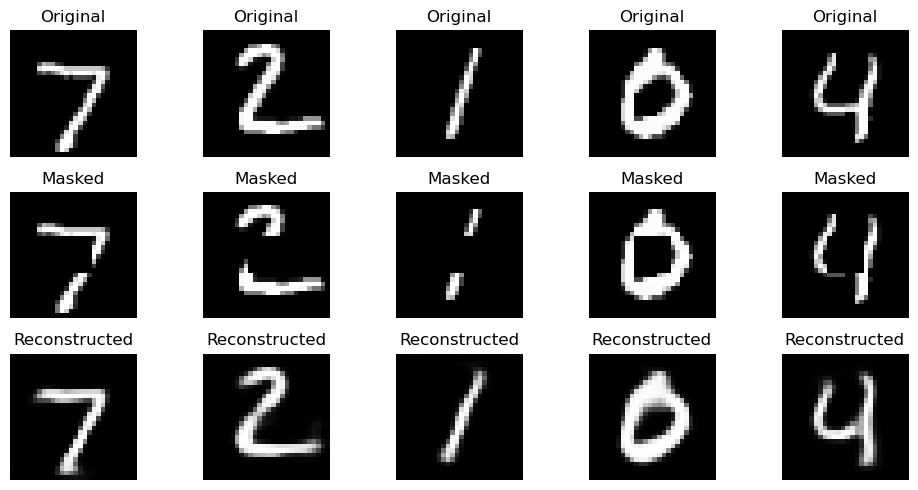

In [ ]:
from tensorflow import keras
import data_generator3
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Concatenate, RandomRotation, RandomZoom

keras.backend.clear_session()

data = data_generator3.DataGenerator()
data.generate(dataset='mnist', N_train=1000)
data.mask_images(mask_size=8)

def build_unet_autoencoder():
    input_img = Input(shape=(28, 28, 1))

    # Data augmentation
    x = RandomRotation(0.1)(input_img)
    x = RandomZoom(0.1)(x)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)

    # Decoder with skip connections
    u2 = UpSampling2D((2, 2))(b)
    u2 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = Concatenate()([u2, c2])
    u2 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    u1 = UpSampling2D((2, 2))(u2)
    u1 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u1 = Concatenate()([u1, c1])
    u1 = Conv2D(32, (3, 3), activation='relu', padding='same')(u1)

    # Output
    decoded = Conv2D(1, (3, 3), activation='tanh', padding='same')(u1)

    model = Model(inputs=input_img, outputs=decoded)
    model.compile(optimizer='adam', loss='mse')
    return model


def plot_results(original, masked, predicted, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        # Original
        plt.subplot(3, num_images, i+1)
        plt.imshow((original[i] + 1) / 2, cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Masked
        plt.subplot(3, num_images, i+1+num_images)
        plt.imshow((masked[i] + 1) / 2, cmap='gray')
        plt.title("Masked")
        plt.axis('off')

        # Reconstructed
        plt.subplot(3, num_images, i+1+2*num_images)
        plt.imshow((predicted[i] + 1) / 2, cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Build and train the model
autoencoder = build_unet_autoencoder()
autoencoder.summary()

# Training
history = autoencoder.fit(
    data.masked_x_train, data.x_train,
    validation_data=(data.masked_x_valid, data.x_valid),
    epochs=100, batch_size=64
)

# Predict and plot the first 5 images
predicted = autoencoder.predict(data.masked_x_test[:5])
plot_results(data.x_test[:5], data.masked_x_test[:5], predicted)

### cifar10

Data specification:
	Dataset type:           cifar10
	Number of classes:      10
	Number of channels:     3
	Training data shape:    (1000, 32, 32, 3)
	Validation data shape:  (5000, 32, 32, 3)
	Test data shape:        (10000, 32, 32, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 random_rotation (RandomRotatio  (None, 32, 32, 3)   0           ['input_1[0][0]']                
 n)                                                                                               
                                                                                                  
 random_zoom (RandomZoom)       (None, 32, 32, 3)    0

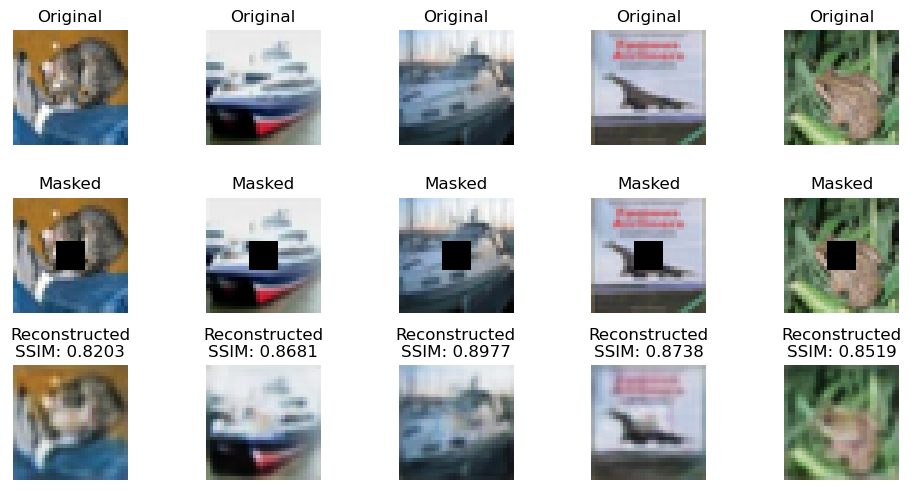

In [ ]:
import importlib
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import data_generator3
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Concatenate, RandomRotation, RandomZoom

keras.backend.clear_session()

data = data_generator3.DataGenerator()
data.generate(dataset='cifar10', N_train=1000)
data.mask_images(mask_size=8)


def build_unet_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Data augmentation
    x = RandomRotation(0.1)(input_img)
    x = RandomZoom(0.1)(x)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)

    # Decoder with skip connections
    u2 = UpSampling2D((2, 2))(b)
    u2 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = Concatenate()([u2, c2])
    u2 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    u1 = UpSampling2D((2, 2))(u2)
    u1 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u1 = Concatenate()([u1, c1])
    u1 = Conv2D(32, (3, 3), activation='relu', padding='same')(u1)

    # Output
    decoded = Conv2D(3, (3, 3), activation='tanh', padding='same')(u1)

    model = Model(inputs=input_img, outputs=decoded)
    model.compile(optimizer='adam', loss='mse')
    return model


def calculate_ssim(original, predicted):
    ssim = tf.image.ssim(original, predicted, max_val=2.0)
    ssim_normalized = (ssim + 1) / 2  # Normalize SSIM from [-1, 1] to [0, 1]
    return ssim_normalized.numpy()

def plot_results(original, masked, predicted, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        # Expand dimensions for SSIM calculation
        original_tensor = tf.convert_to_tensor(np.expand_dims(original[i], axis=0), dtype=tf.float32)
        predicted_tensor = tf.convert_to_tensor(np.expand_dims(predicted[i], axis=0), dtype=tf.float32)
        
        ssim_acc = calculate_ssim(original_tensor, predicted_tensor)[0]

        # Original
        plt.subplot(3, num_images, i+1)
        plt.imshow((original[i] + 1) / 2)
        plt.title("Original")
        plt.axis('off')

        # Masked
        plt.subplot(3, num_images, i+1+num_images)
        plt.imshow((masked[i] + 1) / 2)
        plt.title("Masked")
        plt.axis('off')

        # Reconstructed
        plt.subplot(3, num_images, i+1+2*num_images)
        plt.imshow((predicted[i] + 1) / 2)
        plt.title(f"Reconstructed\nSSIM: {ssim_acc:.4f}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Build and train the model
autoencoder = build_unet_autoencoder()
autoencoder.summary()

# Training
history = autoencoder.fit(
    data.masked_x_train, data.x_train, 
    validation_data=(data.masked_x_valid, data.x_valid),
    epochs=100, batch_size=64
)

# Predict and plot the first 5 images
predicted = autoencoder.predict(data.masked_x_test[:5])
plot_results(data.x_test[:5], data.masked_x_test[:5], predicted)

### Combined for both datasets

Data specification:
	Dataset type:           mnist
	Number of classes:      10
	Number of channels:     1
	Training data shape:    (1000, 28, 28, 1)
	Validation data shape:  (6000, 28, 28, 1)
	Test data shape:        (10000, 28, 28, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 random_rotation (RandomRotatio  (None, 28, 28, 1)   0           ['input_1[0][0]']                
 n)                                                                                               
                                                                                                  
 random_zoom (RandomZoom)       (None, 28, 28, 1)    0  

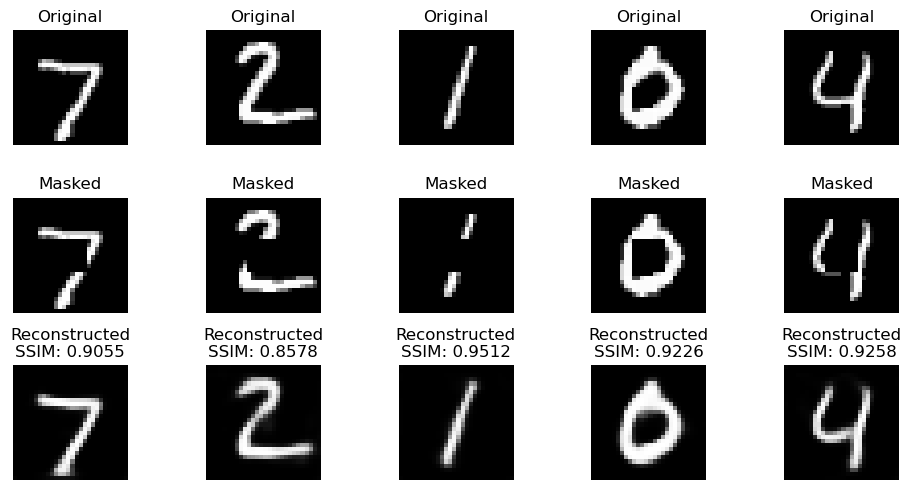

In [ ]:
import numpy as np
import tensorflow as tf
import data_generator3
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Concatenate, RandomRotation, RandomZoom, Dropout

tf.keras.backend.clear_session()

data_gen = data_generator3.DataGenerator()
dataset_type = 'mnist'  # 'mnist' or 'cifar10'
data_gen.generate(dataset=dataset_type, N_train=1000)
data_gen.mask_images(mask_size=8)

# Build U-Net Autoencoder
def build_unet_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Data augmentation
    x = RandomRotation(0.1)(input_img)
    x = RandomZoom(0.1)(x)

    # Encoder
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    c1 = Dropout(0.2)(c1) 
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    c2 = Dropout(0.2)(c2) 
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)

    # Decoder with skip connections
    u2 = UpSampling2D((2, 2))(b)
    u2 = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = Concatenate()([u2, c2])
    u2 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    u1 = UpSampling2D((2, 2))(u2)
    u1 = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u1 = Concatenate()([u1, c1])
    u1 = Conv2D(32, (3, 3), activation='relu', padding='same')(u1)

    # Output layer dynamically matches the input channels
    decoded = Conv2D(input_shape[-1], (3, 3), activation='tanh', padding='same')(u1)
    model = Model(inputs=input_img, outputs=decoded)
    model.compile(optimizer='adam', loss='mse')
    return model

def calculate_ssim(original, predicted):
    ssim = tf.image.ssim(original, predicted, max_val=2.0)
    ssim_normalized = (ssim + 1) / 2  # Normalize SSIM from [-1, 1] to [0, 1]
    return ssim_normalized.numpy()

# Plotting function
def plot_results(original, masked, predicted, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        # Expand dimensions for SSIM calculation
        original_tensor = tf.convert_to_tensor(np.expand_dims(original[i], axis=0), dtype=tf.float32)
        predicted_tensor = tf.convert_to_tensor(np.expand_dims(predicted[i], axis=0), dtype=tf.float32)
        
        # Calculate SSIM accuracy
        ssim_acc = calculate_ssim(original_tensor, predicted_tensor)[0]
        # Original
        plt.subplot(3, num_images, i+1)
        plt.imshow((original[i] + 1) / 2, cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Masked
        plt.subplot(3, num_images, i+1+num_images)
        plt.imshow((masked[i] + 1) / 2, cmap='gray')
        plt.title("Masked")
        plt.axis('off')

        # Reconstructed
        plt.subplot(3, num_images, i+1+2*num_images)
        plt.imshow((predicted[i] + 1) / 2, cmap='gray')
        plt.title(f"Reconstructed\nSSIM: {ssim_acc:.4f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Build and compile the model
input_shape = data_gen.x_train.shape[1:]

autoencoder = build_unet_autoencoder(input_shape)
autoencoder.summary()

# Training
history = autoencoder.fit(
    data_gen.masked_x_train, data_gen.x_train,
    validation_data=(data_gen.masked_x_valid, data_gen.x_valid),
    epochs=100, batch_size=64
)

#calculate average ssim for all test images
all_ssim = []
for i in range(data_gen.x_test.shape[0]):
    original_tensor = tf.convert_to_tensor(np.expand_dims(data_gen.x_test[i], axis=0), dtype=tf.float32)
    predicted_tensor = tf.convert_to_tensor(np.expand_dims(autoencoder.predict(np.expand_dims(data_gen.masked_x_test[i], axis=0)), axis=0), dtype=tf.float32)
    ssim_acc = calculate_ssim(original_tensor, predicted_tensor)[0]
    all_ssim.append(ssim_acc)
print("Average SSIM for all test images: ", np.mean(all_ssim))    

# Predict and visualize the first 5 test images
predicted = autoencoder.predict(data_gen.masked_x_test[:5])
plot_results(data_gen.x_test[:5], data_gen.masked_x_test[:5], predicted)
